In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import callbacks
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN, GRU
from keras.preprocessing import sequence


In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 3000)
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}

max_words = 300
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

embedding_size=32
model=Sequential()
model.add(Embedding(3000, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))



In [3]:
def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)
    else:
        return float(lr*tf.math.exp(-0.5))

E = callbacks.EarlyStopping(patience = 27, monitor = 'val_loss')
L = callbacks.LearningRateScheduler(scheduler)

checkpoint_filepath = '/tmp/checkpoint'
M = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [4]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])


X_valid, y_valid = X_train[:64], y_train[:64]
X_train2, y_train2 = X_train[64:], y_train[64:]
history = model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=64, epochs=3, validation_split = 0.1 ,verbose = 0, callbacks = [E, L, M])
print(history)

In [5]:
model.evaluate(X_test, y_test, verbose=0)


[0.3186750113964081, 0.8630399703979492]

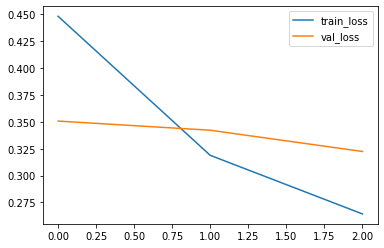

In [6]:
train_loss = history.history['loss']

val_loss = history.history['val_loss']

plt.figure
plt.plot(train_loss , label = 'train_loss')
plt.plot(val_loss , label = 'val_loss')
plt.legend()